In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# Define root directory paths
file_path = "../../combined_data.csv"
df = pd.read_csv(file_path)

In [3]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15858929 entries, 0 to 15858928
Data columns (total 12 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   subject     object
 1   activity    object
 2   trial       object
 3   x_ADXL345   int64 
 4   y_ADXL345   int64 
 5   z_ADXL345   int64 
 6   x_ITG3200   int64 
 7   y_ITG3200   int64 
 8   z_ITG3200   int64 
 9   x_MMA8451Q  int64 
 10  y_MMA8451Q  int64 
 11  z_MMA8451Q  int64 
dtypes: int64(9), object(3)
memory usage: 1.4+ GB


In [4]:
# Display the first few rows
df.head()

,subject,activity,trial,x_ADXL345,y_ADXL345,z_ADXL345,x_ITG3200,y_ITG3200,z_ITG3200,x_MMA8451Q,y_MMA8451Q,z_MMA8451Q
0,SA01,D01,R01,17,-179,-99,-18,-504,-352,76,-697,-279
1,SA01,D01,R01,15,-174,-90,-53,-568,-306,48,-675,-254
2,SA01,D01,R01,1,-176,-81,-84,-613,-271,-2,-668,-221
3,SA01,D01,R01,-10,-180,-77,-104,-647,-227,-34,-697,-175
4,SA01,D01,R01,-21,-191,-63,-128,-675,-191,-74,-741,-133


In [5]:
# No. of rows and columns in the dataset
df.shape

(15858929, 12)

In [6]:
# Statistical measures of columns in the dataset
df.describe()

,x_ADXL345,y_ADXL345,z_ADXL345,x_ITG3200,y_ITG3200,z_ITG3200,x_MMA8451Q,y_MMA8451Q,z_MMA8451Q
count,1.585893e+07,1.585893e+07,1.585893e+07,1.585893e+07,1.585893e+07,1.585893e+07,1.585893e+07,1.585893e+07,1.585893e+07
mean,-1.237190e+00,-1.787412e+02,-2.772492e+01,-9.714189e+00,3.517304e+01,-4.465375e+00,-1.889273e+01,-7.005180e+02,-5.936869e+01
std,1.050061e+02,1.499351e+02,1.248853e+02,5.908545e+02,4.895010e+02,3.981378e+02,4.086284e+02,5.827475e+02,5.061164e+02
min,-4.096000e+03,-4.096000e+03,-4.096000e+03,-3.230300e+04,-1.549100e+04,-1.315000e+04,-8.192000e+03,-8.192000e+03,-8.192000e+03
25%,-2.200000e+01,-2.530000e+02,-9.200000e+01,-7.600000e+01,-1.800000e+01,-3.300000e+01,-9.700000e+01,-9.900000e+02,-3.170000e+02
50%,2.000000e+00,-2.300000e+02,-3.100000e+01,-1.100000e+01,3.800000e+01,-5.000000e+00,1.000000e+00,-9.050000e+02,-6.800000e+01
75%,2.600000e+01,-5.400000e+01,3.300000e+01,6.500000e+01,9.400000e+01,2.300000e+01,8.200000e+01,-2.090000e+02,1.850000e+02
max,4.094000e+03,4.092000e+03,4.091000e+03,3.276700e+04,1.581900e+04,1.379800e+04,8.191000e+03,8.191000e+03,8.191000e+03


In [7]:
# Check for missing values in the entire dataset
missing_values = df.isnull().sum()

missing_values

subject       0
activity      0
trial         0
x_ADXL345     0
y_ADXL345     0
z_ADXL345     0
x_ITG3200     0
y_ITG3200     0
z_ITG3200     0
x_MMA8451Q    0
y_MMA8451Q    0
z_MMA8451Q    0
dtype: int64

In [8]:
# Finding out the no. or subjects, activities and trials that has been carried out
print("Unique subjects:", df.subject.nunique())
print("Unique activities:", df.activity.nunique())
print("Unique trials:", df.trial.nunique())
# No of activities per trials vary.
# Some activities have only one trials, but some activities have upto 5 trials.

Unique subjects: 38
Unique activities: 34
Unique trials: 6


In [9]:
df.trial.unique()

array(['R01', 'R02', 'R03', 'R04', 'R05', 'R06'], dtype=object)

In [10]:
df[df['trial'] == 'R06'].head(2)

,subject,activity,trial,x_ADXL345,y_ADXL345,z_ADXL345,x_ITG3200,y_ITG3200,z_ITG3200,x_MMA8451Q,y_MMA8451Q,z_MMA8451Q
15517542,SE14,D07,R06,-8,-239,-94,-59,42,-5,-44,-927,-305
15517543,SE14,D07,R06,-5,-242,-102,-60,45,-8,-41,-933,-304


In [11]:
# Filter the data for subject 'SE14' and activity 'D07'
se14_d07_data = df[(df['subject'] == 'SE14') & (df['activity'] == 'D07')]

# Get unique combinations of subject, activity, and trial
unique_combinations = se14_d07_data[['subject', 'activity', 'trial']].drop_duplicates()

unique_combinations

,subject,activity,trial
15507943,SE14,D07,R01
15510342,SE14,D07,R02
15512742,SE14,D07,R03
15515142,SE14,D07,R05
15517542,SE14,D07,R06


In [12]:
# Filter the data for subject 'SE14' and activity 'D07'
se14_d07_data = df[(df['subject'] == 'SE14') & (df['activity'] == 'D07')]

# Rename R05 as R04 and R06 as R05 in the trial column using .loc
df.loc[(df['subject'] == 'SE14') & (df['activity'] == 'D07'), 'trial'] = df.loc[(df['subject'] == 'SE14') & (df['activity'] == 'D07'), 'trial'].replace({'R05': 'R04', 'R06': 'R05'})

# Verify the changes
df[['subject', 'activity', 'trial']].drop_duplicates()

,subject,activity,trial
0,SA01,D01,R01
19999,SA01,D02,R01
39999,SA01,D03,R01
59999,SA01,D04,R01
79999,SA01,D05,R01
...,...,...,...
15821931,SE15,D16,R01
15824330,SE15,D16,R02
15826730,SE15,D16,R03
15829130,SE15,D16,R04


In [13]:
# Creating a new column for label based on the activity performed - label encoding
df['label'] = df['activity'].apply(lambda x: 1 if x[0] == 'F' else 0)
# label= 1 (Fall)
# label= 0 (Non Fall)

In [14]:
# Group the DataFrame by subject, activity and trial
grouped = df.groupby(['subject', 'activity', 'trial'])

In [15]:
len(grouped)

4500

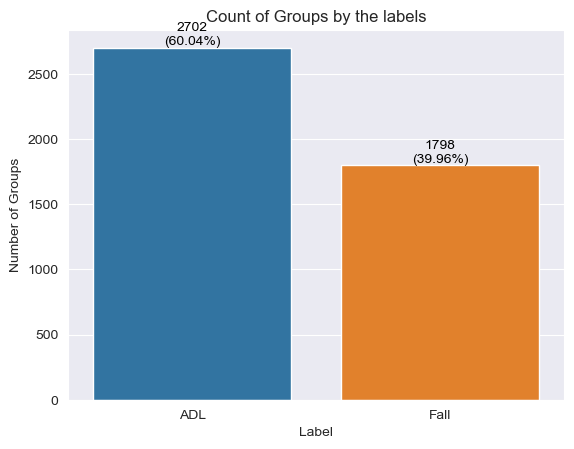

In [16]:
# Computing the mean of each group
grouped_mean = grouped.mean()

# Calculate class times and percentages
class_counts = grouped_mean['label'].value_counts()
class_percentages = (class_counts / class_counts.sum()) * 100

# Check the class distribution
ax = sns.countplot(x='label', data=grouped_mean)

# Add annotations for counts and percentages
for p, count, perc in zip(ax.patches, class_counts, class_percentages):
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(f'{count}\n({perc:.2f}%)', xy=(x, y), ha='center', va='bottom', fontsize=10, color='black')


# Set labels and title for better readability
plt.xlabel('Label')
plt.ylabel('Number of Groups')
plt.title('Count of Groups by the labels')
plt.xticks([0, 1], ['ADL', 'Fall'])  # Labeling 0 as ADL and 1 as Fall
plt.show()

In [17]:
# No. of groups
grouped.size()

subject  activity  trial
SA01     D01       R01      19999
         D02       R01      20000
         D03       R01      20000
         D04       R01      20000
         D05       R01       5000
                            ...  
SE15     D17       R01       9999
                   R02      10000
                   R03      10000
                   R04      10000
                   R05      10000
Length: 4500, dtype: int64

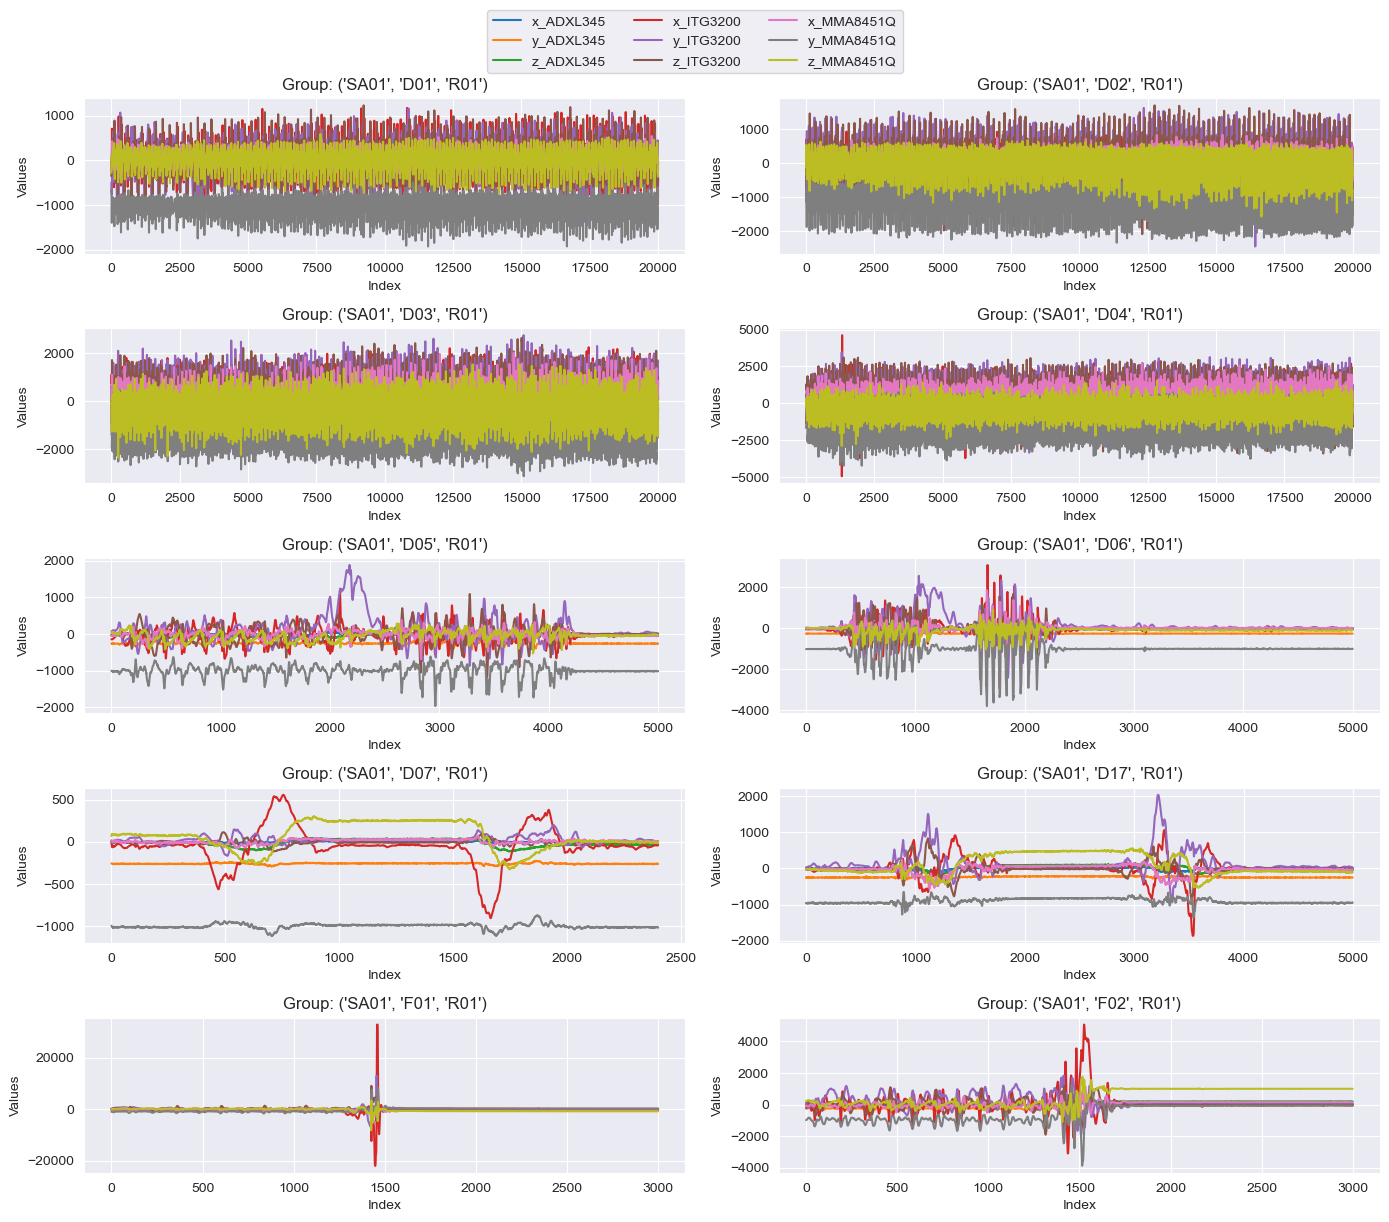

In [18]:
# To have an idea of what does data from long sequences look like one sample from each case will be printed out.

# Define the specific activities you want to plot
selected_activities = ["D01", "D02", "D03", "D04", "D05", "D06", "D07", "D17", "F01", "F02"]

# Create a list to hold one group from each activity
groups_to_plot = []

# Iterate over selected activities and pick the first matching group for each activity
for activity in selected_activities:
    for group_key in grouped.groups.keys():
        if activity in group_key:
            groups_to_plot.append(group_key)
            break  # Break after finding the first matching group for the activity

# Ensure we have only 10 groups
groups_to_plot = groups_to_plot[:10]

# Create subplots: 10 plots in a grid of 5 rows × 2 columns
fig, axes = plt.subplots(5, 2, figsize=(14, 12))
axes = axes.flatten()  # Flatten axes for easier access

# Initialize a variable to capture the legend handles and labels
handles, labels = None, None

# Plot each selected group
for i, group_key in enumerate(groups_to_plot):
    # Extract the group's data
    group_data = grouped.get_group(group_key)
    
    # Reset the index so x-values start from 0
    group_data_reset = group_data.reset_index(drop=True)
    
    # Drop identifiers and plot the remaining sensor data
    ax = axes[i]
    plot = group_data_reset.drop(['subject', 'activity', 'trial', 'label'], axis=1, errors='ignore').plot(
        ax=ax, title=f"Group: {group_key}", legend=False  # Only capture the legend once
    )
    
    # Capture the legend handles and labels (from the first plot)
    if handles is None and labels is None:
        handles, labels = ax.get_legend_handles_labels()

    ax.set_xlabel("Index")
    ax.set_ylabel("Values")

# Remove unused subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add a single legend outside the plot grid
fig.legend(handles, labels, loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.02))

# Improve layout
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust layout to fit the legend
plt.show()


In [19]:
# Define the activities that need the middle 12 seconds
selected_activities_first = ["D01", "D02", "D03", "D04", "D05", "D17"]

# Define the activities that need the first 12 seconds
selected_activities_second = ["D07", "D08", "D09", "D10", "D11", "D12", "D13", "D14", 
                              "D15", "D16", "D18", "D19", "D06", "F01", "F02", "F03", 
                              "F04", "F05", "F06", "F07", "F08", "F09", "F10", "F11", 
                              "F12", "F13", "F14", "F15"]

# Create an empty list to store the filtered data for these groups
filtered_groups_first = []
filtered_groups_second = []

# Iterate over each group in 'grouped' for first set of activities
for group_key, group_data in grouped:
    # Check if the activity is one of the selected activities for the first set (middle 12 seconds)
    if any(activity in group_key for activity in selected_activities_first):
        total_rows = len(group_data)
        
        # Calculate the number of rows to trim based on the total row count
        rows_to_trim = (total_rows - 2400) // 2  # Keep 2400 rows in the middle
        
        # Trim the rows dynamically, for both even and odd row counts
        middle_12_seconds = group_data.iloc[rows_to_trim:-rows_to_trim]
        
        # Check if the number of rows is 2401 (i.e., odd number), remove the last row if necessary
        if len(middle_12_seconds) > 2400:
            middle_12_seconds = middle_12_seconds.iloc[:2400]  # Remove the last row
        
        # Append the trimmed group to the list
        filtered_groups_first.append(middle_12_seconds)

# Iterate over each group in 'grouped' for second set of activities
for group_key, group_data in grouped:
    # Check if the activity is one of the selected activities for the second set (first 12 seconds)
    if any(activity in group_key for activity in selected_activities_second):
        # Trim to keep the first 12 seconds
        first_12_seconds = group_data.iloc[:2400]
        
        # Append the trimmed group to the list
        filtered_groups_second.append(first_12_seconds)

# Concatenate the filtered groups from both sets of activities into one DataFrame
trimmed_df = pd.concat(filtered_groups_first + filtered_groups_second)

# Group the data by subject, activity, and trial
trimmed_groups = trimmed_df.groupby(['subject', 'activity', 'trial'])

# Print the size of each group after trimming to verify
print(trimmed_groups.size())

subject  activity  trial
SA01     D01       R01      2400
         D02       R01      2400
         D03       R01      2400
         D04       R01      2400
         D05       R01      2400
                            ... 
SE15     D17       R01      2400
                   R02      2400
                   R03      2400
                   R04      2400
                   R05      2400
Length: 4500, dtype: int64


In [20]:
trimmed_groups.size().unique()

array([2400, 2399, 2398, 2395, 2394, 2396, 2001, 1999, 2000], dtype=int64)

In [21]:
grouped.size().unique()

array([19999, 20000,  5000,  2400,  4999,  3000,  2999,  2399,  3001,
        3006,  5005,  2982,  2981,  4981,  5001,  2998,  2996,  2398,
        2395,  2997, 19997,  4998,  2394,  2396,  2891, 35999, 36000,
        2401,  2001,  1999,  2000,  5406,  4605,  5008,  4205,  4603,
        3204,  3205,  3607, 20001, 22006,  4606,  5011,  4806,  4206,
        3807,  4006,  5007,  3404,  3405,  3804,  2404, 19995, 19985,
       19998, 19996,  4993,  4997, 19990,  9999, 10000], dtype=int64)

In [22]:
group_sizes = grouped.size()
group_sizes[group_sizes < 2400].unique()

array([2399, 2398, 2395, 2394, 2396, 2001, 1999, 2000], dtype=int64)

In [23]:
# Function to pad groups with fewer than 2400 rows by duplicating the last row
def pad_with_last_row(group):
    current_size = len(group)
    if current_size < 2400:
        # Calculate how many rows are needed
        rows_to_add = 2400 - current_size
        # Repeat the last row as needed and concatenate
        last_row = group.iloc[[-1]]  # Select the last row as a DataFrame
        padding = pd.concat([last_row] * rows_to_add, ignore_index=True)
        # Concatenate the original group with the padding
        group = pd.concat([group, padding], ignore_index=True)
    return group

# Apply the function to all groups in the DataFrame
trimmed_df = (
    trimmed_df.groupby(['subject', 'activity', 'trial'], group_keys=False)
    .apply(pad_with_last_row)
)

# Verify that all groups now have 2400 rows
print(trimmed_df.groupby(['subject', 'activity', 'trial']).size().unique())

[2400]


In [24]:
trimmed_groups = trimmed_df.groupby(['subject', 'activity', 'trial'])
trimmed_groups.size()

subject  activity  trial
SA01     D01       R01      2400
         D02       R01      2400
         D03       R01      2400
         D04       R01      2400
         D05       R01      2400
                            ... 
SE15     D17       R01      2400
                   R02      2400
                   R03      2400
                   R04      2400
                   R05      2400
Length: 4500, dtype: int64

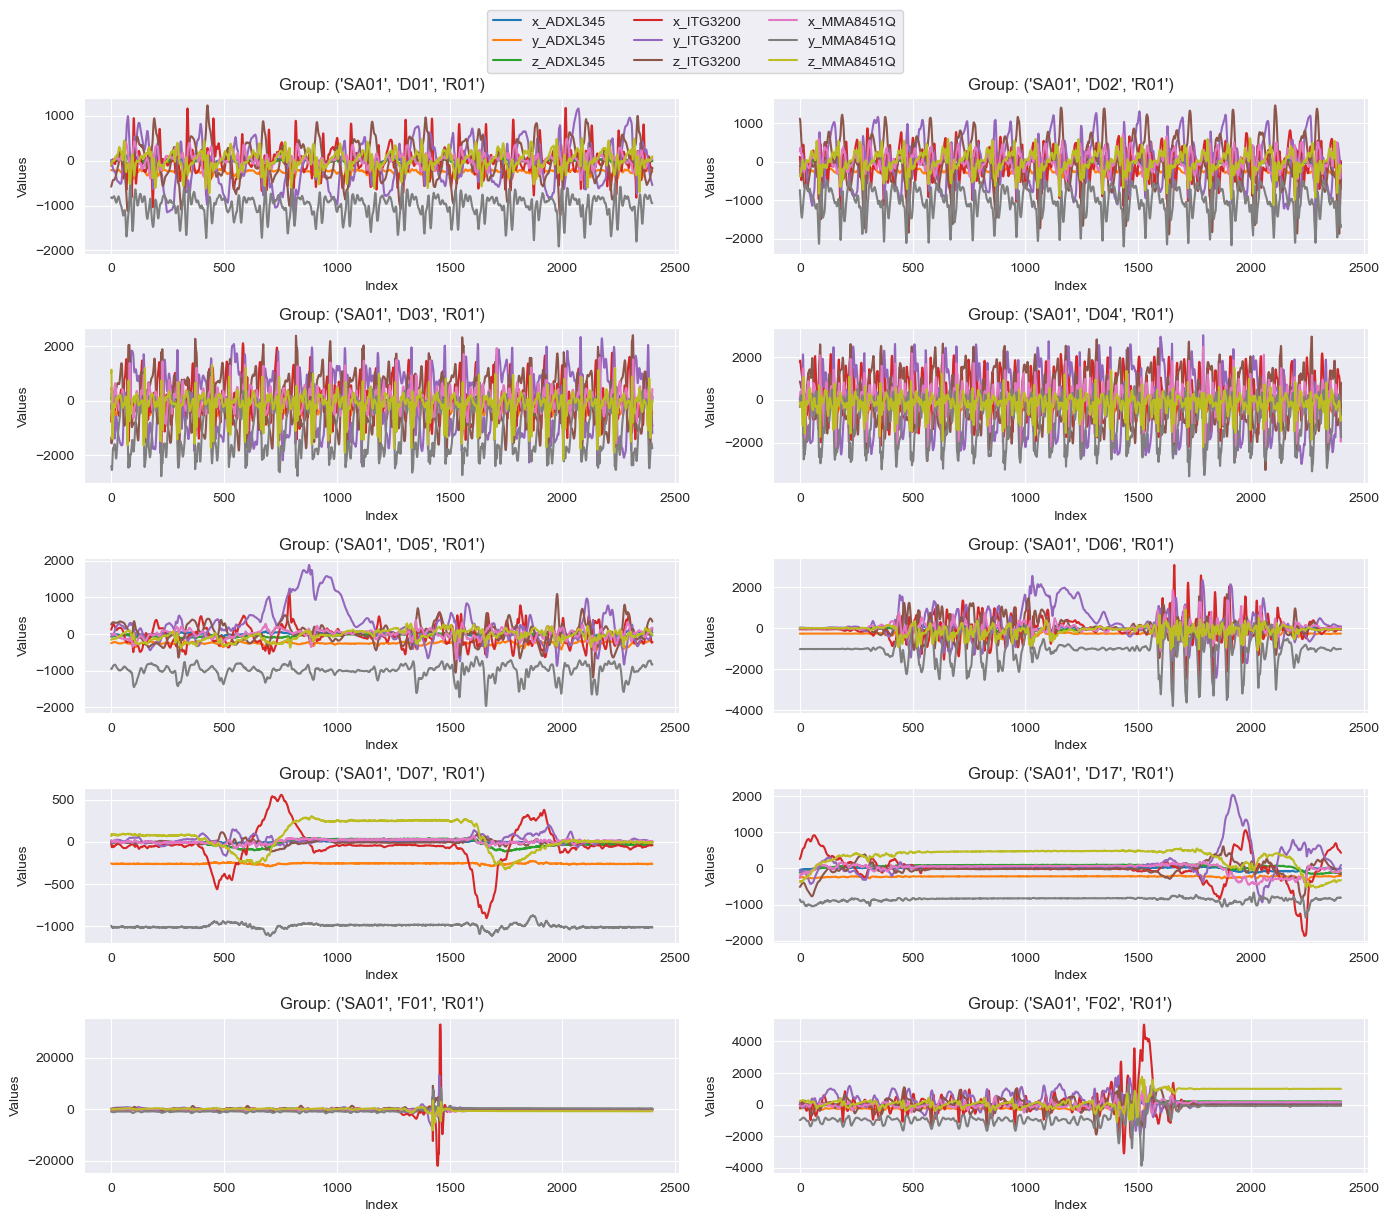

In [25]:
# To plot the trimmed group for verification

# Define the specific activities you want to plot
selected_activities = ["D01", "D02", "D03", "D04", "D05", "D06", "D07", "D17", "F01", "F02"]

# Create a list to hold one group from each activity
groups_to_plot = []

# Iterate over selected activities and pick the first matching group for each activity
for activity in selected_activities:
    for group_key in trimmed_groups.groups.keys():
        if activity in group_key:
            groups_to_plot.append(group_key)
            break  # Break after finding the first matching group for the activity

# Ensure we have only 10 groups
groups_to_plot = groups_to_plot[:10]

# Create subplots: 10 plots in a grid of 5 rows × 2 columns
fig, axes = plt.subplots(5, 2, figsize=(14, 12))
axes = axes.flatten()  # Flatten axes for easier access

# Initialize a variable to capture the legend handles and labels
handles, labels = None, None

# Plot each selected group
for i, group_key in enumerate(groups_to_plot):
    # Extract the group's data
    group_data = trimmed_groups.get_group(group_key)
    
    # Reset the index so x-values start from 0
    group_data_reset = group_data.reset_index(drop=True)
    
    # Drop identifiers and plot the remaining sensor data
    ax = axes[i]
    plot = group_data_reset.drop(['subject', 'activity', 'trial', 'label'], axis=1, errors='ignore').plot(
        ax=ax, title=f"Group: {group_key}", legend=False  # Only capture the legend once
    )
    
    # Capture the legend handles and labels (from the first plot)
    if handles is None and labels is None:
        handles, labels = ax.get_legend_handles_labels()

    ax.set_xlabel("Index")
    ax.set_ylabel("Values")

# Remove unused subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add a single legend outside the plot grid
fig.legend(handles, labels, loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.02))

# Improve layout
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust layout to fit the legend
plt.show()

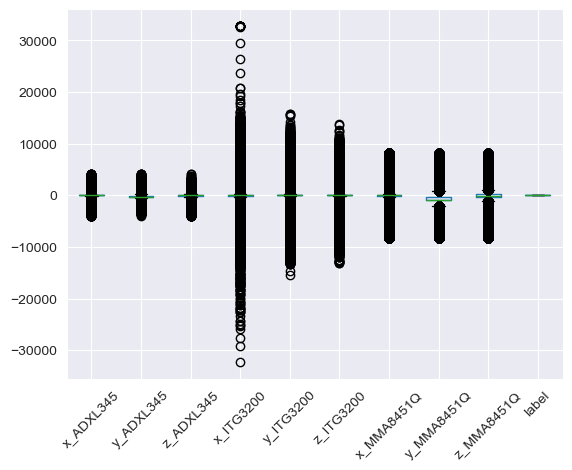

In [26]:
# Check for Outliers
trimmed_df.boxplot()

# Rotate x-axis labels
plt.xticks(rotation=45)

plt.show()

In [26]:
# Create a new index column by concatenating 'subject', 'trial', and 'activity'
trimmed_df['index'] = trimmed_df['subject'].astype(str) + '_' + trimmed_df['trial'].astype(str) + '_' + trimmed_df['activity']

# Check the result
print(trimmed_df[['subject', 'trial', 'activity', 'index']].head())

# Drop the 'subject', 'trial', and 'activity' columns
trimmed_df = trimmed_df.drop(['subject', 'trial', 'activity'], axis=1)

     subject trial activity         index
8799    SA01   R01      D01  SA01_R01_D01
8800    SA01   R01      D01  SA01_R01_D01
8801    SA01   R01      D01  SA01_R01_D01
8802    SA01   R01      D01  SA01_R01_D01
8803    SA01   R01      D01  SA01_R01_D01


In [27]:
# Check the result
print(trimmed_df.columns)

Index(['x_ADXL345', 'y_ADXL345', 'z_ADXL345', 'x_ITG3200', 'y_ITG3200',
       'z_ITG3200', 'x_MMA8451Q', 'y_MMA8451Q', 'z_MMA8451Q', 'label',
       'index'],
      dtype='object')


In [34]:
# Grouping
trimmed_groups = trimmed_df.groupby('index')

In [35]:
# Train Test Validation Splitting

# Convert grouped data to a list of group keys (tuples) and their corresponding dataframes
group_keys = list(trimmed_groups.groups.keys())
group_data = [trimmed_groups.get_group(key) for key in group_keys]

# Shuffle the groups (keeping the group integrity)
train_groups, temp_groups = train_test_split(group_data, test_size=0.4, random_state=42)  # 60% training data
val_groups, test_groups = train_test_split(temp_groups, test_size=0.5, random_state=42)  # Split remaining 40% into 20% validation, 20% test

# Reconstruct DataFrames for each split
train_df = pd.concat(train_groups)
val_df = pd.concat(val_groups)
test_df = pd.concat(test_groups)

# Display the size of each split
print(f"Training set size: {train_df.shape}")
print(f"Validation set size: {val_df.shape}")
print(f"Test set size: {test_df.shape}")

Training set size: (6480000, 11)
Validation set size: (2160000, 11)
Test set size: (2160000, 11)


In [36]:
train_df.columns

Index(['x_ADXL345', 'y_ADXL345', 'z_ADXL345', 'x_ITG3200', 'y_ITG3200',
       'z_ITG3200', 'x_MMA8451Q', 'y_MMA8451Q', 'z_MMA8451Q', 'label',
       'index'],
      dtype='object')

In [37]:
# Extract features and labels from grouped data
sensor_columns = ['x_ADXL345', 'y_ADXL345', 'z_ADXL345', 
                 'x_ITG3200', 'y_ITG3200', 'z_ITG3200', 
                 'x_MMA8451Q', 'y_MMA8451Q', 'z_MMA8451Q']

# Convert groups to numpy arrays
X_train = np.array([group[sensor_columns].values for group in train_groups])
X_val = np.array([group[sensor_columns].values for group in val_groups])
X_test = np.array([group[sensor_columns].values for group in test_groups])

y_train = np.array([group['label'].iloc[0] for group in train_groups])
y_val = np.array([group['label'].iloc[0] for group in val_groups])
y_test = np.array([group['label'].iloc[0] for group in test_groups])

# Store original shapes
original_shape_train = X_train.shape
original_shape_val = X_val.shape
original_shape_test = X_test.shape

# Reshape for scaling (combine samples and timestamps)
X_train_reshaped = X_train.reshape(-1, X_train.shape[-1])  # Shape: (n_samples*2400, 9)
X_val_reshaped = X_val.reshape(-1, X_val.shape[-1])
X_test_reshaped = X_test.reshape(-1, X_test.shape[-1])

In [38]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reshaped)
X_val_scaled = scaler.transform(X_val_reshaped)
X_test_scaled = scaler.transform(X_test_reshaped)

In [39]:
# Reshape back to 3D
X_train_scaled = X_train_scaled.reshape(original_shape_train)  # Shape: (n_samples, 2400, 9)
X_val_scaled = X_val_scaled.reshape(original_shape_val)
X_test_scaled = X_test_scaled.reshape(original_shape_test)

In [43]:
X_train = X_train_scaled
X_val = X_val_scaled 
X_test = X_test_scaled

In [47]:
y_train.shape

(2700,)

In [49]:
X_train.shape

(2700, 2400, 9)

In [51]:
# Save the datasets
np.save('X_train.npy', X_train)
np.save('y_train.npy', y_train)
np.save('X_val.npy', X_val)
np.save('y_val.npy', y_val)
np.save('X_test.npy', X_test)
np.save('y_test.npy', y_test)

## 1D Convolutional Neural Network

In [50]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Define the model
model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(2400, 9)),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

ImportError: DLL load failed while importing _errors: The specified procedure could not be found.

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=20,                # Number of epochs (adjust as needed)
    batch_size=32,            # Batch size
    validation_data=(X_val, y_val)  # Use your validation set
)

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

In [ ]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()